In [1]:
import csv
from cv2 import imread,cvtColor
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

In [2]:
file = open('driver_imgs_list.csv')
lst = csv.reader(file)
file_list = []
for i in lst:
    file_list.append(i)
file_list.pop(0)
w = 120
h = 160

In [3]:
def read_file(file):
    img = cv2.imread('train/'+file[1]+'/'+file[2],0)
    img = cv2.resize(img,(w,h), interpolation=cv2.INTER_LINEAR)
    img = img.astype(np.float32)/255.0
    label = int(file[1][1])
    return img.reshape([1,-1]),label
def show(array):
    plt.figure()
    plt.imshow(array.reshape([h,w]), cmap="gray")
    plt.show()
def get_batch(batch_size):
    j = np.random.randint(0,20788,batch_size)
    batch = np.zeros((batch_size,w*h))
    k = 0
    label = np.zeros((batch_size,10))
    for i in j:
        batch[k:k+1,:],lab = read_file(file_list[i])
        label[k,lab] = 1
        k+=1
    return batch,label
def get_test_batch(batch_size):
    j = np.random.randint(20788,22424,batch_size)
    batch = np.zeros((batch_size,w*h))
    k = 0
    label = np.zeros((batch_size,10))
    for i in j:
        batch[k:k+1,:],lab = read_file(file_list[i])
        label[k,lab] = 1
        k+=1
    return batch,label

In [4]:
num_steps = 500000000
lr = 0.0001
display_step = 200
batch_size = 64

In [5]:
h_3_size = 3000
input_size = w * h

In [6]:
x = tf.placeholder (dtype=tf.float32,shape=[None, input_size])

In [7]:
h_3 = tf.layers.dense(inputs=x,units=h_3_size,activation=tf.nn.tanh)
#h_2 = tf.layers.dense(inputs=h_3,units=h_2_size,activation=tf.nn.relu)
#h_1 = tf.layers.dense(inputs=h_2,units=h_1_size,activation=tf.nn.sigmoid)

#d_1 = tf.layers.dense(inputs=h_1, units=h_2_size, activation=tf.nn.sigmoid)
#d_2 = tf.layers.dense(inputs=d_1, units=h_3_size,activation= tf.nn.relu)
d_3 = tf.layers.dense(inputs=h_3, units=input_size ,activation=tf.nn.sigmoid)

#loss = tf.reduce_mean(tf.pow(x - d_3, 2))
t_loss = x * tf.log(1e-5 + d_3) + (1 - x) * tf.log(1e-5 + 1 - d_3)
loss = tf.reduce_mean(-tf.reduce_sum(t_loss, 1))
optimizer = tf.train.RMSPropOptimizer(learning_rate=0.000001).minimize(loss)


In [8]:
Y = tf.placeholder (dtype=tf.float32,shape=[None, 10])
y_1 = tf.layers.dense(inputs=h_3,units=5000,name='Alper3',activation=tf.nn.sigmoid)
y_11 = tf.layers.dense(inputs=y_1,units=1000,name='Alper32',activation=tf.nn.sigmoid)
y_2 = tf.layers.dense(inputs=y_11,units=10,name='Alper31')
clf_loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=Y, logits=y_2))
alper_list = [v for v in tf.trainable_variables() if 'Alper3' in v.name]
optimizer2 = tf.train.AdamOptimizer().minimize(clf_loss,var_list=alper_list)
correctPred = tf.equal(tf.argmax(y_2,1), tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(correctPred, tf.float32))

In [9]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

Step 1: Minibatch Loss: 8520.801758


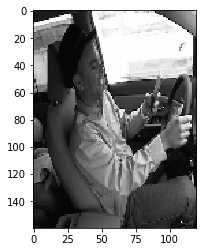

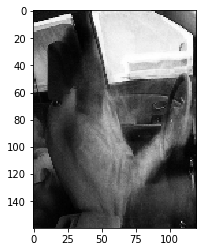

8583.075
8551.694
8570.176
8583.134
8546.313
8548.993
8586.772
8624.515
8584.372
8590.215
8565.676
8566.21
8545.447
8543.429
8553.101
8589.588
8571.193
8566.781
8541.679
8588.925
Step 200: Minibatch Loss: 8588.924805


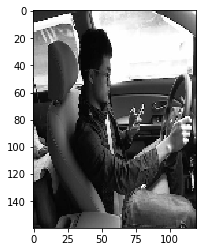

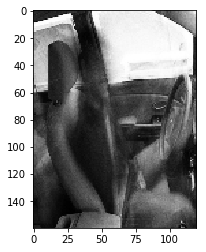

8534.229
8575.389
8485.648
8591.165
8543.44
8535.354
8562.369
8535.645
8567.449
8567.836
8542.1045
8575.064
8540.678
8558.954
8557.473
8554.743
8541.861
8577.895
8536.078
8546.775
Step 400: Minibatch Loss: 8546.775391


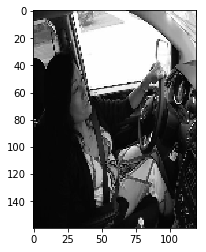

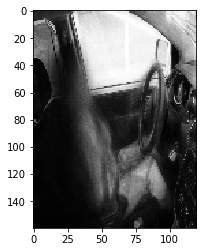

8521.066
8595.35
8487.285
8555.271
8526.008
8540.466
8532.0205
8534.95
8512.139
8549.402
8558.115
8526.839
8508.068
8579.926


KeyboardInterrupt: 

In [11]:
# Start Training# Training
for i in range(1, num_steps+1):
    # Prepare Data
    # Get the next batch of MNIST data (only images are needed, not labels)
    batch_x,_ = get_batch(1024)

    # Run optimization op (backprop) and cost op (to get loss value)
    _, l,img = sess.run([optimizer, loss,d_3], feed_dict={x: batch_x})
    # Display logs per step
    if i % 10 == 0:
        print(l)
    if i % display_step == 0 or i == 1:
        print('Step %i: Minibatch Loss: %f' % (i, l))
        lr *= 0.9
        show(batch_x[0:1,:])
        show(img[0:1,:])

In [15]:
for i in range(10000):
    batch_x,label = get_batch(batch_size)
    _,l,acc = sess.run([optimizer2, clf_loss,accuracy], feed_dict={x: batch_x,Y:label})
    print(l,acc)
    if i % 100 == 0:
        batch_x,label = get_test_batch(batch_size)
        l,acc = sess.run([clf_loss,accuracy], feed_dict={x: batch_x,Y:label})
        print('-----',l,acc)

0.22353458 0.9375
----- 2.619029 0.296875
0.15946327 0.96875
0.2163595 0.90625
0.22384895 0.90625
0.16734898 0.96875
0.14609838 0.984375
0.19669601 0.9375
0.37617803 0.890625
0.21967825 0.921875
0.31589168 0.921875
0.39065477 0.875
0.27165934 0.96875
0.22414206 0.953125
0.19872952 0.96875
0.362444 0.828125
0.23189804 0.96875
0.33447647 0.90625
0.22161436 0.96875
0.34048218 0.875
0.15748268 0.953125
0.2403799 0.9375
0.20398366 0.953125
0.41559428 0.84375
0.33939052 0.890625
0.23158622 0.9375
0.26732925 0.921875
0.21981128 0.9375
0.25046065 0.90625
0.30481982 0.90625
0.30080098 0.890625
0.3761536 0.890625
0.43625185 0.84375
0.4716952 0.859375
0.29877952 0.890625
0.2988224 0.875
0.310812 0.90625
0.3362916 0.890625
0.31121412 0.90625
0.35108784 0.859375
0.4027492 0.875
0.26105514 0.90625
0.1769054 0.96875
0.1813536 0.96875
0.2926948 0.890625
0.18871565 0.921875
0.21199113 0.953125
0.32908458 0.90625
0.2995939 0.890625
0.31322056 0.90625
0.24955836 0.921875
0.18182811 0.96875
0.30337396 0.8

KeyboardInterrupt: 

In [ ]:
total_acc = 0
for i in range(100):
    batch_x,label = get_test_batch(batch_size)
    l,acc = sess.run([clf_loss,accuracy], feed_dict={x: batch_x,Y:label})
    total_acc += acc
print(total_acc/100)